In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
query = "Chia Teck Leng"
query = query.replace(' ', '+')

# Grab links from Google
r = requests.get('https://www.google.com.sg/search?q=site%3Awww.straitstimes.com+{}'.format(query))
soup = BeautifulSoup(r.text, "html.parser")

links = []
for item in soup.find_all('h3', attrs={'class' : 'r'}):
    links.append(item.a['href'][7:]) # [7:] strips the /url?q= prefix

print(links)

['http://www.straitstimes.com/singapore/courts-crime/guilty-as-charged-chia-teck-leng-led-a-double-life-and-cheated-banks-of&sa=U&ved=0ahUKEwiRi8vy7OXZAhUK6Y8KHaShAxwQFggUMAA&usg=AOvVaw3HyD7SUE5zJKCPTS6K8TfV', '?q=site:www.straitstimes.com+Chia+Teck+Leng&ie=UTF-8&prmd=ivns&tbm=isch&tbo=u&source=univ&sa=X&ved=0ahUKEwiRi8vy7OXZAhUK6Y8KHaShAxwQsAQIGw', 'http://www.straitstimes.com/singapore/courts-crime/guilty-as-charged-25-crimes-that-have-shaken-singapore-since-1965&sa=U&ved=0ahUKEwiRi8vy7OXZAhUK6Y8KHaShAxwQFgglMAU&usg=AOvVaw3ELTkAJ1tNidjgFsw2pSaE', 'http://www.straitstimes.com/singapore/courts-crime/alleged-match-fixing-kingpin-dan-tans-ex-wife-on-trial-for-giving-false&sa=U&ved=0ahUKEwiRi8vy7OXZAhUK6Y8KHaShAxwQFggsMAY&usg=AOvVaw1Ge-ywbBQD29OMzCXNm8mX', 'http://www.straitstimes.com/singapore/sph-announces-key-appointment-changes-in-chinese-media-group&sa=U&ved=0ahUKEwiRi8vy7OXZAhUK6Y8KHaShAxwQFggzMAc&usg=AOvVaw2UHZHtzfixxCE0AmCH-hFl', 'http://www.straitstimes.com/singapore/health/winne

In [3]:
# crawl links, cleanup and concat responses
from readability.readability import Document
import html2text

text = ""

for link in links:
    print(link.split('&')[0])
    try:
        if "pdf" in link:
            raise Exception('general exceptions not caught by specific handling')
        r = requests.get(link.split('&')[0])
    except:
        print("can't grab: " + link.split('&')[0])
    #readable_article = Document(r.text).summary()
    readable_title = Document(r.text).short_title()
    text += html2text.html2text(readable_title)

#print(text)

http://www.straitstimes.com/singapore/courts-crime/guilty-as-charged-chia-teck-leng-led-a-double-life-and-cheated-banks-of
?q=site:www.straitstimes.com+Chia+Teck+Leng
can't grab: ?q=site:www.straitstimes.com+Chia+Teck+Leng
http://www.straitstimes.com/singapore/courts-crime/guilty-as-charged-25-crimes-that-have-shaken-singapore-since-1965
http://www.straitstimes.com/singapore/courts-crime/alleged-match-fixing-kingpin-dan-tans-ex-wife-on-trial-for-giving-false
http://www.straitstimes.com/singapore/sph-announces-key-appointment-changes-in-chinese-media-group
http://www.straitstimes.com/singapore/health/winners
http://www.straitstimes.com/singapore/courts-crime/family-in-court-tussle-over-540000-estate
http://www.straitstimes.com/singapore/a-street-urchins-journey-to-death-row-and-back
http://www.straitstimes.com/singapore/national-day-awards-2017
http://www.straitstimes.com/sites/default/files/attachments/2015/09/12/st_ge_results.compressed.pdf
can't grab: http://www.straitstimes.com/site

In [4]:
print(text)

403 Forbidden

403 Forbidden

403 Forbidden

403 Forbidden

403 Forbidden

403 Forbidden

403 Forbidden

403 Forbidden

National Day Awards 2017

National Day Awards 2017




In [40]:
import spacy
from spacy import displacy

nlp = spacy.load('en')
doc = nlp(text)

org_ents = ""

for entity in doc.ents:
    print(entity.text, entity.label_)
    if entity.label_ == "MISC":
        org_ents += entity.text
        org_ents += " "


 GPE

 GPE

 GPE
since-1965 DATE

 GPE

 GPE

 GPE

 GPE
awards-2017 DATE

 GPE
 

 PERSON
6122493 DATE
3151 790 CARDINAL
552 CARDINAL
1132235 DATE
5 CARDINAL
6111365 DATE
550 CARDINAL
122 0000000017 00000 CARDINAL
0000002913 DATE

00000 n 0000003941 00000 EVENT
00000 CARDINAL
0000115981 DATE

00000 EVENT
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000328370 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000369635 DATE
00000 CARDINAL
00000 CARDINAL
0000390776 DATE

00000 n 0000416456 00000 EVENT
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000485054 DATE
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000523036 00000 DATE
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000540097 DATE
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000541828 DATE
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000682717 DATE
00000 CARDINAL
00000 CARDINAL
00000 CARDINAL
0000724412 CARDINAL
00000 C

In [36]:
print(org_ents)

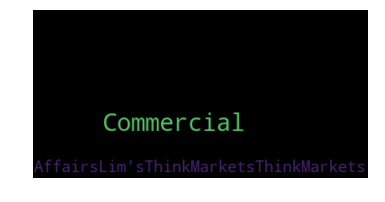

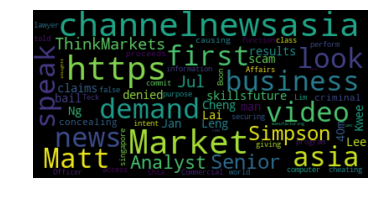

In [29]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(org_ents)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()